Dataset shape: (1288, 1850)
Number of classes: 7


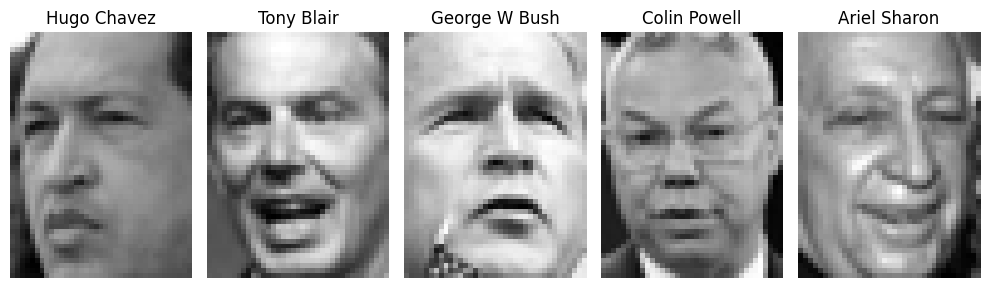

Data preprocessing complete.
Training set shape: (1030, 150)
Testing set shape: (258, 150)

Training SVM Model...
Fav Parameters: {'C': 10, 'gamma': 0.001}
accuracy: 0.8527

Training Random Forest Model...


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Fav Parameters: {'max_depth': 30, 'min_samples_split': 2}
accuracy: 0.5736

Training Neural Network Model...
Fav Parameters: {'alpha': 0.01, 'hidden_layer_sizes': (100,)}
accuracy: 0.8372


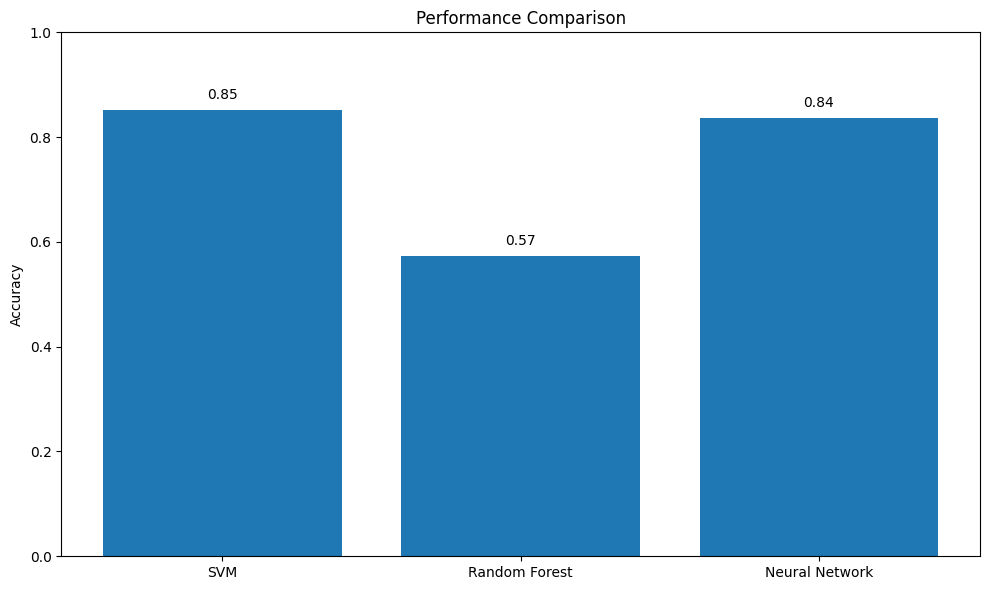


Reports:

SVM Model:
                   precision    recall  f1-score   support

     Ariel Sharon       0.93      0.88      0.90        16
     Colin Powell       0.81      0.91      0.86        47
  Donald Rumsfeld       0.74      0.71      0.72        24
    George W Bush       0.90      0.92      0.91       106
Gerhard Schroeder       0.71      0.77      0.74        22
      Hugo Chavez       0.90      0.64      0.75        14
       Tony Blair       0.92      0.76      0.83        29

         accuracy                           0.85       258
        macro avg       0.84      0.80      0.82       258
     weighted avg       0.86      0.85      0.85       258


Random Forest Model:
                   precision    recall  f1-score   support

     Ariel Sharon       0.00      0.00      0.00        16
     Colin Powell       0.82      0.68      0.74        47
  Donald Rumsfeld       1.00      0.21      0.34        24
    George W Bush       0.50      0.98      0.67       106
Gerhard 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import fetch_lfw_people                     # dataset import
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


from sklearn.svm import SVC                                       # importing Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier


from sklearn.metrics import (                                     # importing metrics
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_recall_fscore_support
)
from sklearn.model_selection import GridSearchCV

class LFW_face_recognition:                                         # dataset processing
    def __init__(self, min_faces_per_person=70):                  # Minimum number of faces per person to include
        self.lfw_people = fetch_lfw_people(                       # Fetching LFW dataset
            min_faces_per_person=min_faces_per_person,
            resize=0.4                                            # Downscaling images for faster processing
        )

        self.X = self.lfw_people.data                             # Dataset attributes
        self.y = self.lfw_people.target
        self.target_names = self.lfw_people.target_names

        self.X_train = None                                       # Preprocessing containers
        self.X_test = None
        self.y_train = None
        self.y_test = None

        print(f"Dataset shape: {self.X.shape}")
        print(f"Number of classes: {len(self.target_names)}")

    def vis_data(self, n_samples=5):                                             #Visualizing sample images/faces

        plt.figure(figsize=(10, 4))
        for i in range(n_samples):
            plt.subplot(1, n_samples, i+1)
            plt.imshow(self.X[i].reshape(50, 37), cmap=plt.cm.gray)
            plt.title(self.target_names[self.y[i]])
            plt.axis('off')
        plt.tight_layout()
        plt.show()

    def pre_process_data(self, test_size=0.2, random_state=42):                    # Preprocessing data

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(  # Splitting into train and test sets
            self.X, self.y,
            test_size=test_size,                                                  # defining test size
            random_state=random_state,                                            # initializing random seed
            stratify=self.y
        )

        self.scaler = StandardScaler()                                            # Scaling
        self.X_train_scaled = self.scaler.fit_transform(self.X_train)
        self.X_test_scaled = self.scaler.transform(self.X_test)


        self.pca = PCA(n_components=150, svd_solver='randomized', whiten=True)    # applying PCA
        self.X_train_pca = self.pca.fit_transform(self.X_train_scaled)
        self.X_test_pca = self.pca.transform(self.X_test_scaled)

        print("Data preprocessing complete.")
        print(f"Training set shape: {self.X_train_pca.shape}")
        print(f"Testing set shape: {self.X_test_pca.shape}")

    def train_models(self):                                                       # Initializing different modern machine learning models

        self.models = {                                                           # defnining model config
            'SVM': {
                'model': SVC(kernel='rbf', class_weight='balanced'),
                'params': {
                    'C': [1, 10, 100],
                    'gamma': [0.001, 0.01, 0.1]
                }
            },
            'Random Forest': {
                'model': RandomForestClassifier(n_estimators=100),
                'params': {
                    'max_depth': [10, 20, 30],
                    'min_samples_split': [2, 5, 10]
                }
            },
            'Neural Network': {
                'model': MLPClassifier(max_iter=1000),
                'params': {
                    'hidden_layer_sizes': [(50,50,50), (100,)],
                    'alpha': [0.0001, 0.001, 0.01]
                }
            }
        }

        self.model_results = {}                                                   # Storing model results


        for name, config in self.models.items():                                  # Applying Grid search and cross-validation for each model
            print(f"\nTraining {name} Model...")
            grid_search = GridSearchCV(
                config['model'],
                config['params'],
                cv=5,
                n_jobs=-1
            )
            grid_search.fit(self.X_train_pca, self.y_train)

            fav_model = grid_search.best_estimator_                              # Best model using gridsearch estimator
            y_pred = fav_model.predict(self.X_test_pca)

            accuracy = accuracy_score(self.y_test, y_pred)                        # defining metrics
            precision, recall, f1, _ = precision_recall_fscore_support(
                self.y_test, y_pred, average='weighted'
            )

            self.model_results[name] = {                                          # Storing results
                'model': fav_model,
                'accuracy': accuracy,
                'precision': precision,
                'recall': recall,
                'f1_score': f1,
                'best_params': grid_search.best_params_
            }

            print(f"Fav Parameters: {grid_search.best_params_}")
            print(f"accuracy: {accuracy:.4f}")

    def eval_models(self):                                                    # evaluating models
                                                                                  # visualizing for better results
        plt.figure(figsize=(10, 6))
        model_names = list(self.model_results.keys())
        accuracies = [result['accuracy'] for result in self.model_results.values()]

        plt.bar(model_names, accuracies)
        plt.title('Performance Comparison')
        plt.ylabel('Accuracy')
        plt.ylim(0, 1)

        for i, v in enumerate(accuracies):
            plt.text(i, v + 0.02, f'{v:.2f}', ha='center')

        plt.tight_layout()
        plt.show()


        print("\nReports:")                                                       # comparitive report
        for name, result in self.model_results.items():
            print(f"\n{name} Model:")
            print(classification_report(
                self.y_test,
                result['model'].predict(self.X_test_pca),
                target_names=self.target_names
            ))

    def run_pipeline(self):                                                  # execute whole code flow-
        self.vis_data()                                                  # from preprocess to eval
        self.pre_process_data()
        self.train_models()
        self.eval_models()


def main():                                                                       # calling main and executing the program.
    face_recog_pipeline = LFW_face_recognition()
    face_recog_pipeline.run_pipeline()

main()

Dataset shape: (1288, 1850)
Number of classes: 7
Data preprocessing complete.
Training set shape: (1030, 150)
Testing set shape: (258, 150)


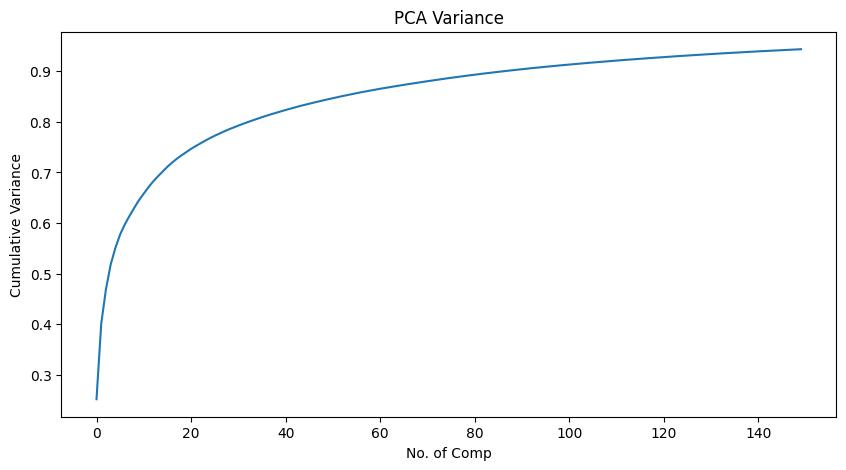

In [15]:
face_recognition_pipeline = LFWFaceRecognition()
face_recognition_pipeline.preprocess_data()

                                                        # plotting PCA explained variance
def pca_explained_variance_diag(lfw_recognition):
    plt.figure(figsize=(10, 5))                         # plot PCA explained variance ratio
    plt.plot(
        np.cumsum(lfw_recognition.pca.explained_variance_ratio_)
    )
    plt.xlabel('No. of Comp')
    plt.ylabel('Cumulative Variance')
    plt.title('PCA Variance')
    plt.show()
pca_explained_variance_diag(face_recognition_pipeline)